In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando dados e atribuindo a variáveis
df_amb = pd.read_csv('data/data_life_bs.csv')
df_fem = pd.read_csv('data/data_life_f.csv')
df_mas = pd.read_csv('data/data_life_m.csv')
df_pop = pd.read_csv('data/data_pop.csv')
df_pop.columns = ['Year', 'Age', 'Feminino', 'Masculino', 'Total']

In [3]:
#formando lista com anos a serem trabalhados
print('Os anos a seres usados como base para análise são: ')
lista_anos = []
for c in range(0, len(df_fem['Year'].unique()), 11):
    ano = df_fem['Year'].unique()[c]
    print(ano)
    lista_anos.append(ano)

Os anos a seres usados como base para análise são: 
1983
1994
2005
2016


5. Atribuir um intervalo de tempo, sugerido em vinte anos, e calcular taxas de crescimento, nominais e geométricas, de cada intervalo, sobre a expectativa de vida ao
nascer (idade 0) e aos 60 anos, para homens, mulheres e ambos os sexos.

In [4]:
#função para extrair a expectativa de vida de determinados anos e idade específica
def exp_vida(df, anos, idade):
    lista_exp_vida = []
    for c in range(0, len(anos)):
        ano = anos[c]
        exp_vida = df[(df['Year'] == ano) & (df['Age'] == idade)]['ex']
        lista_exp_vida.append(exp_vida.iloc[0])
    
    return pd.DataFrame(dict(Ano = anos, ex = lista_exp_vida))
#função para calcular a taxa de crescimento da expectativa de vida por faixa anual
def tx_exp(df):
    tx_ex_nominal = []
    tx_ex_geometrica = []
    faixa_ano = []
    for c in range(0, len(df['ex'])-1):
        tx_nominal = (df['ex'].iloc[c+1] - df['ex'].iloc[c])/df['ex'].iloc[c]
        tx_geometrica = ((df['ex'].iloc[c+1]/df['ex'].iloc[c])**(1/(df['Ano'].iloc[c+1] - df['Ano'].iloc[c]))) - 1
        tx_ex_nominal.append(tx_nominal*100)
        tx_ex_geometrica.append(tx_geometrica*100)
        ano = '{} - {}'.format(df['Ano'].iloc[c], df['Ano'].iloc[c+1])
        faixa_ano.append(ano)
    return pd.DataFrame(dict(Ano = faixa_ano, tx_nominal = tx_ex_nominal, tx_geometrica = tx_ex_geometrica))

In [5]:
ex_fem_0 = exp_vida(df_fem, lista_anos, 0)
ex_fem_60 = exp_vida(df_fem, lista_anos, 60)
tx_fem_0 = tx_exp(ex_fem_0)
tx_fem_60 = tx_exp(ex_fem_60)
print(tx_fem_0)
print(tx_fem_60)

           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.907475       0.349068
1  1994 - 2005    3.244875       0.290725
2  2005 - 2016    2.619077       0.235310
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994   10.458806       0.908396
1  1994 - 2005    8.575257       0.750744
2  2005 - 2016    7.280954       0.640963


In [6]:
ex_mas_0 = exp_vida(df_mas, lista_anos, 0)
ex_mas_60 = exp_vida(df_mas, lista_anos, 60)
tx_mas_0 = tx_exp(ex_mas_0)
tx_mas_60 = tx_exp(ex_mas_60)
print(tx_mas_0)
print(tx_mas_60)

           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.529412       0.315821
1  1994 - 2005    3.290169       0.294725
2  2005 - 2016    3.172573       0.284339
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    7.031669       0.619681
1  1994 - 2005    9.127382       0.797212
2  2005 - 2016    8.226103       0.721247


In [7]:
ex_amb_0 = exp_vida(df_amb, lista_anos, 0)
ex_amb_60 = exp_vida(df_amb, lista_anos, 60)
tx_amb_0 = tx_exp(ex_amb_0)
tx_amb_60 = tx_exp(ex_amb_60)
print(tx_amb_0)
print(tx_amb_60)

           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.769046       0.336907
1  1994 - 2005    3.297269       0.295351
2  2005 - 2016    2.867830       0.257374
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    9.039548       0.789834
1  1994 - 2005    8.996703       0.786233
2  2005 - 2016    7.562662       0.664959


6. Gerar um gráfico que mostre a evolução da expectativa de vida ao nascer ao longo
do período observado, para homens, mulheres e ambos os sexos.

In [13]:
todos_anos = df_fem['Year'].unique()

In [12]:
ex_fem_0 = exp_vida(df_fem, todos_anos, 0)
ex_mas_0 = exp_vida(df_mas, todos_anos, 0)
ex_amb_0 = exp_vida(df_amb, todos_anos, 0)

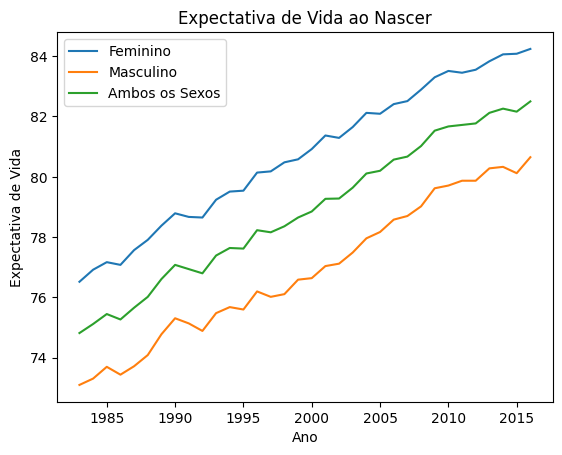

In [15]:
fig, ax = plt.subplots()
ex_fem_0.plot(x='Ano', y='ex', kind='line', ax=ax, label='Feminino', title='Expectativa de Vida ao Nascer')
ex_mas_0.plot(x='Ano', y='ex', kind='line', ax=ax, label='Masculino')
ex_amb_0.plot(x='Ano', y='ex', kind='line', ax=ax, label='Ambos os Sexos')
ax.set_xlabel('Ano')
ax.set_ylabel('Expectativa de Vida')
plt.legend()
plt.show()

7. Gerar um gráfico que mostre a evolução da expectativa de vida aos 60 anos ao longo
do período observado, para homens, mulheres e ambos os sexos.

In [16]:
ex_fem_60 = exp_vida(df_fem, todos_anos, 60)
ex_mas_60 = exp_vida(df_mas, todos_anos, 60)
ex_amb_60 = exp_vida(df_amb, todos_anos, 60)

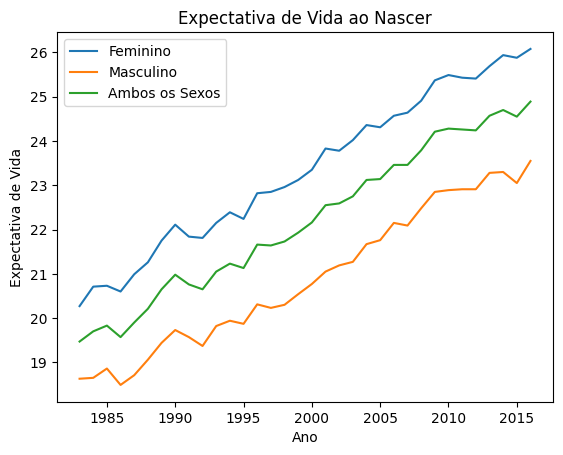

In [17]:
fig, ax = plt.subplots()
ex_fem_60.plot(x='Ano', y='ex', kind='line', ax=ax, label='Feminino', title='Expectativa de Vida ao Nascer')
ex_mas_60.plot(x='Ano', y='ex', kind='line', ax=ax, label='Masculino')
ex_amb_60.plot(x='Ano', y='ex', kind='line', ax=ax, label='Ambos os Sexos')
ax.set_xlabel('Ano')
ax.set_ylabel('Expectativa de Vida')
plt.legend()
plt.show()

8. Gerar gráficos para observar a probabilidade de morte (qx ) em função da idade,
conforme os anos de observação (os intervalos sugeridos nos cálculos das taxas). O
eixo Y deve estar em escala logarítmica e o eixo X deve conter as idades.

In [12]:
#função para filtrar a prbabilidade de morte pelos anos determinados e plotar o gráfico de qx em relação a idade 0 a 60 anos
def plot_qx(data, anos, sexo):
    idade = list(map(lambda x: x, range(0, 61)))
    probs = data[(data['Year'].isin(anos)) & (data['Age'].isin(idade))][['Year', 'Age', 'qx']]
    plt.figure(figsize=(17, 6))
    for c in range(0, len(anos)):
        ano = anos[c]
        probs_ano = probs[probs['Year'] == ano]
        plt.plot(probs_ano['Age'], probs_ano['qx'], label = ano)
    plt.title(f'Probabilidade de Morte em Relação a Idade - {sexo}')
    plt.xlabel('Idade')
    plt.ylabel('Probabilidade de Morte')
    plt.yscale('log')
    plt.legend(title='Anos', loc='lower right')
    plt.tick_params(axis='x', labelsize=8)
    plt.show()

    

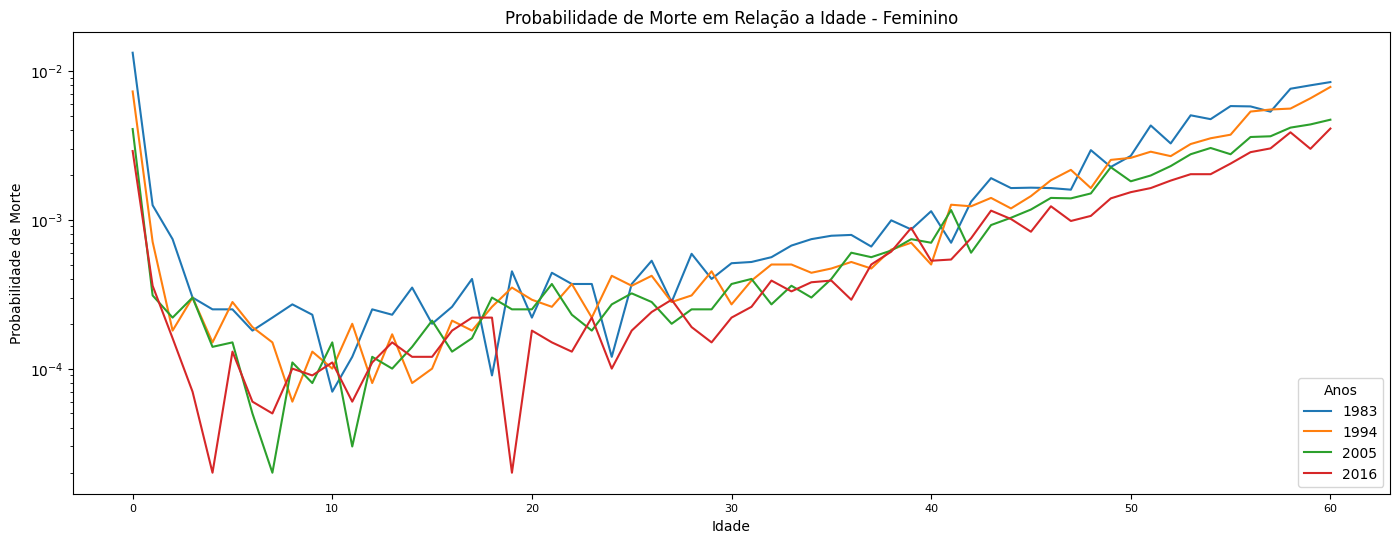

In [13]:
qx_fem = plot_qx(df_fem, lista_anos, 'Feminino')
qx_fem

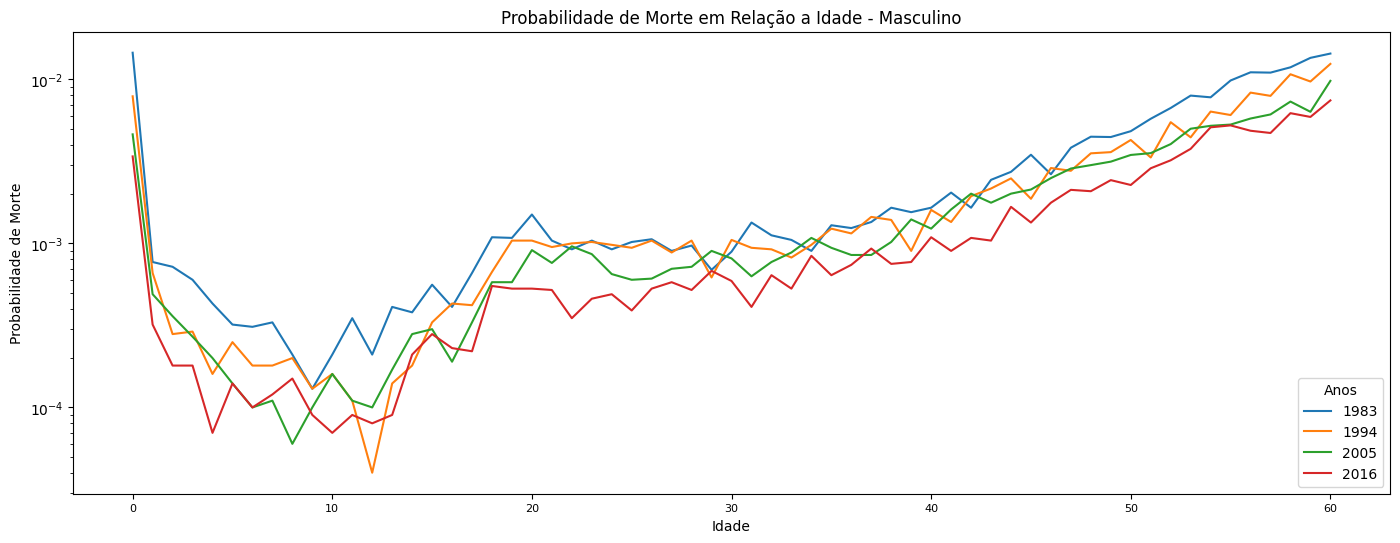

In [14]:
qx_mas = plot_qx(df_mas, lista_anos, 'Masculino')
qx_mas

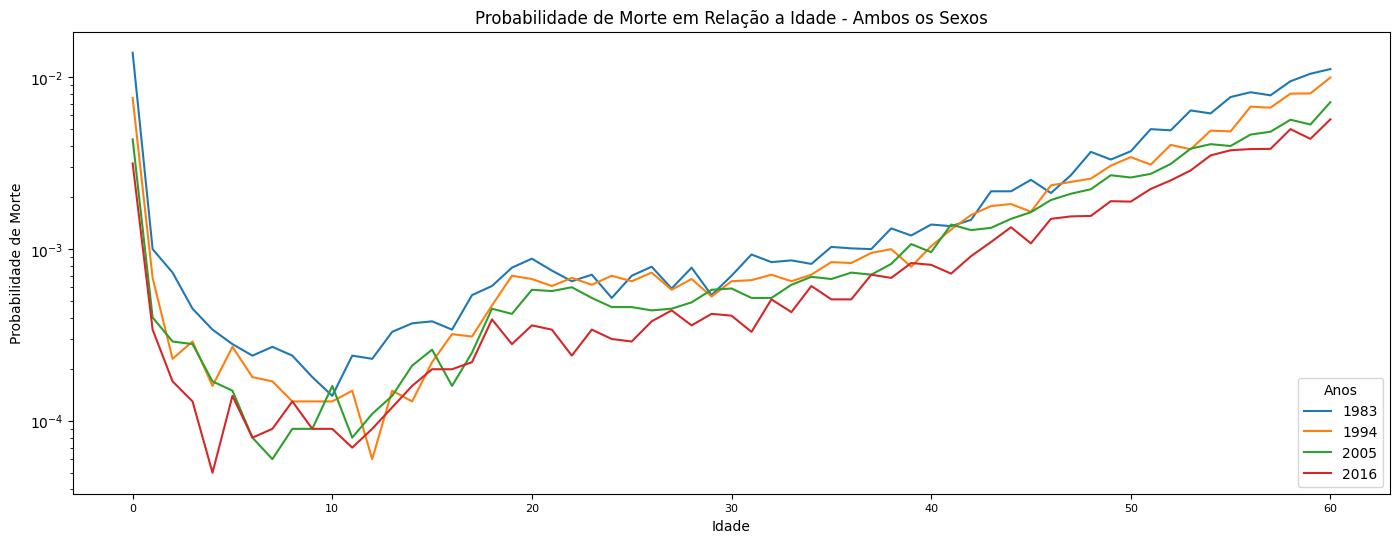

In [15]:
qx_amb = plot_qx(df_amb, lista_anos, 'Ambos os Sexos')
qx_amb

9. Calcular as taxas de crescimento anuais da população de homens, mulheres e ambos
os sexos.

In [37]:
def tx_cresc(tipo):    
    lista_faixa_ano = []
    lista_tx_cresc = []
    for c in range(0, len(todos_anos)-1):
        faixa_ano = (f'{todos_anos[c]}-{todos_anos[c+1]}')
        lista_faixa_ano.append(faixa_ano)
        dados_1 = sum(df_pop[(df_pop['Year'] == todos_anos[c])][tipo])
        dados_2 = sum(df_pop[(df_pop['Year'] == todos_anos[c+1])][tipo])
        tx_cresc = (dados_2 - dados_1)/dados_1
        lista_tx_cresc.append(tx_cresc*100)
    dict_tx = dict(Ano = lista_faixa_ano, tx_cresc = lista_tx_cresc)
    return pd.DataFrame(dict_tx)

In [46]:
tx_cresc_fem = tx_cresc('Feminino')
tx_cresc_mas = tx_cresc('Masculino')
tx_cresc_tot = tx_cresc('Total')
dict_tx_cres = dict(Faixa = tx_cresc_fem['Ano'],Feminino = tx_cresc_fem['tx_cresc'], Masculino = tx_cresc_mas['tx_cresc'], Total = tx_cresc_tot['tx_cresc'])
df_cresc = pd.DataFrame(dict_tx_cres)
df_cresc

,Faixa,Feminino,Masculino,Total
0,1983-1984,1.746271,1.808168,1.777141
1,1984-1985,1.994571,2.013913,2.004221
2,1985-1986,1.638191,1.547783,1.593084
3,1986-1987,1.590966,1.493959,1.542588
4,1987-1988,1.833787,1.721263,1.777698
5,1988-1989,1.620792,1.580869,1.600903
6,1989-1990,1.980386,1.847293,1.914094
7,1990-1991,5.811391,5.286219,5.549978
8,1991-1992,5.076853,4.561384,4.820911
9,1992-1993,2.746628,2.571977,2.660124


10. Gerar um gráfico que demonstre a taxa de crescimento anual. No eixo Y, a taxa; e
no eixo X, os anos observados.


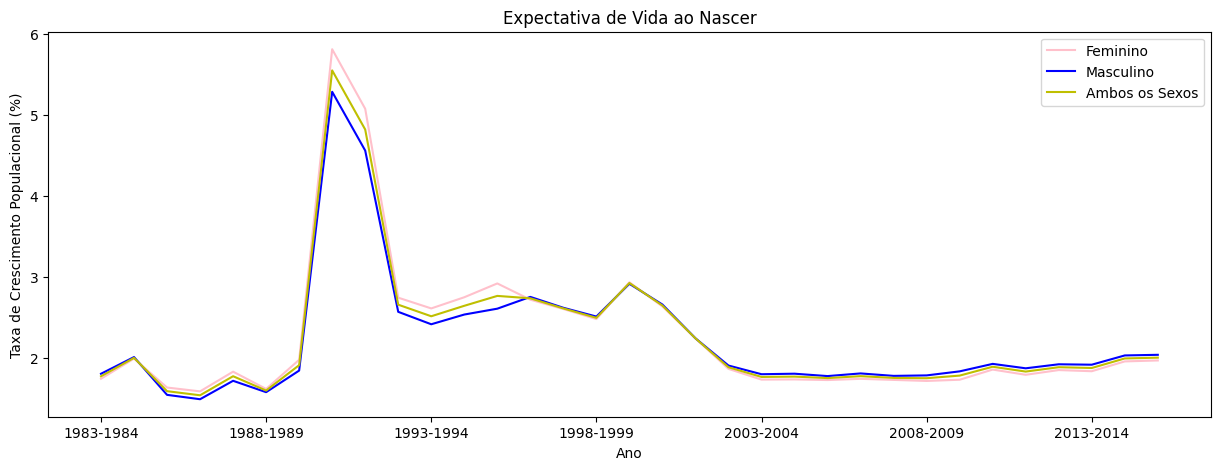

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
df_cresc.plot(x='Faixa', y='Feminino', kind='line', ax=ax, label='Feminino', title='Taxa de Crescimento Populacional Anual', color='pink')
df_cresc.plot(x='Faixa', y='Masculino', kind='line', ax=ax, label='Masculino', color='blue')
df_cresc.plot(x='Faixa', y='Total', kind='line', ax=ax, label='Ambos os Sexos', color='y')
ax.set_xlabel('Ano')
ax.set_ylabel('Taxa de Crescimento Populacional (%)')
plt.legend()
plt.show()

11. Gerar um gráfico da evolução da população no período observado, para homens,
mulheres e o total.

In [60]:
lista_pop_fem = []
for c in range(0, len(todos_anos)):
    pop_fem = sum(df_pop[(df_pop['Year'] == todos_anos[c])]['Feminino'])
    lista_pop_fem.append(pop_fem)

lista_pop_mas = []
for c in range(0, len(todos_anos)):
    pop_mas = sum(df_pop[(df_pop['Year'] == todos_anos[c])]['Masculino'])
    lista_pop_mas.append(pop_mas)

lista_pop_tot = []
for c in range(0, len(todos_anos)):
    pop_tot = sum(df_pop[(df_pop['Year'] == todos_anos[c])]['Total'])
    lista_pop_tot.append(pop_tot)

dict_pop = dict(Ano = todos_anos, Feminino = lista_pop_fem, Masculino = lista_pop_mas, Total = lista_pop_tot)
df_populacao = pd.DataFrame(dict_pop)

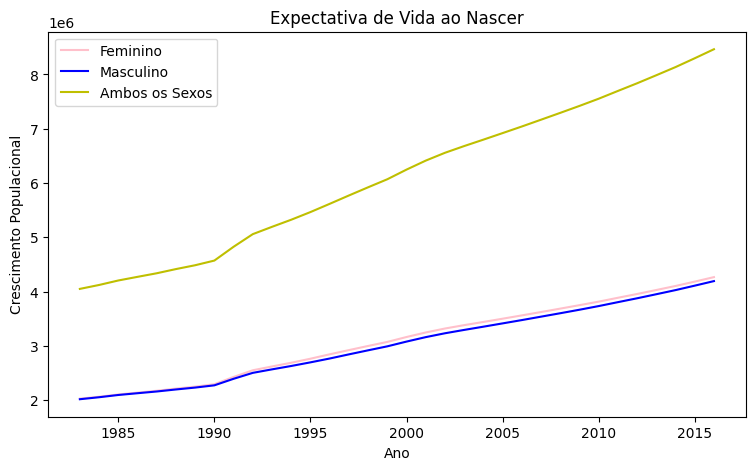

In [64]:
fig, ax = plt.subplots(figsize=(9, 5))
df_populacao.plot(x='Ano', y='Feminino', kind='line', ax=ax, label='Feminino', title='Crescimento Populacional ao ANo', color='pink')
df_populacao.plot(x='Ano', y='Masculino', kind='line', ax=ax, label='Masculino', color='blue')
df_populacao.plot(x='Ano', y='Total', kind='line', ax=ax, label='Ambos os Sexos', color='y')
ax.set_xlabel('Ano')
ax.set_ylabel('Crescimento Populacional')
plt.legend()
plt.show()

12. Gerar pirâmides etárias, de homens e mulheres, para cada ano do intervalo escolhido.

In [19]:
#função para plotar a pirâmide etária
def plot_piramide_etaria(quant_ano, intervalo):
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    axs = axs.ravel()

    #definindo intervalo de idade
    idade = list(map(lambda x: x, range(0, len(df_pop['Age'].unique()), intervalo)))
    #listando os anos
    years = list(map(lambda x: -x + df_pop['Year'].max(), range(0, quant_ano, intervalo)))
    
    #dados para homens
    hm = (df_pop[df_pop['Year'].isin(years)][['Masculino', 'Age', 'Year']])
    hm = hm[hm['Age'].isin(idade)][['Masculino', 'Year']]
    #dados para mulheres
    fm = (df_pop[df_pop['Year'].isin(years)][['Feminino', 'Age', 'Year']])
    fm = fm[fm['Age'].isin(idade)][['Feminino', 'Year']]
    #plotando os gráficos em conjunto
    for c in range(0, len(years)):
        masc = hm[hm['Year'] == years[c]]['Masculino']
        fem = fm[fm['Year'] == years[c]]['Feminino']
        
        ax = axs[c]
        ax.barh(idade, masc, color='blue', label='Homens', height=3)
        ax.barh(idade, [-val for val in fem], color='pink', label='Mulheres', height=3)
        
        ax.set_yticks(idade)
        ax.set_xlabel('População')
        ax.set_title(f'Pirâmide Etária - {years[c]}')
        ax.legend()
        ax.tick_params(axis='y', labelsize=6)
        ax.grid(False)
        
        xlim = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
        ax.set_xlim(-xlim, xlim)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

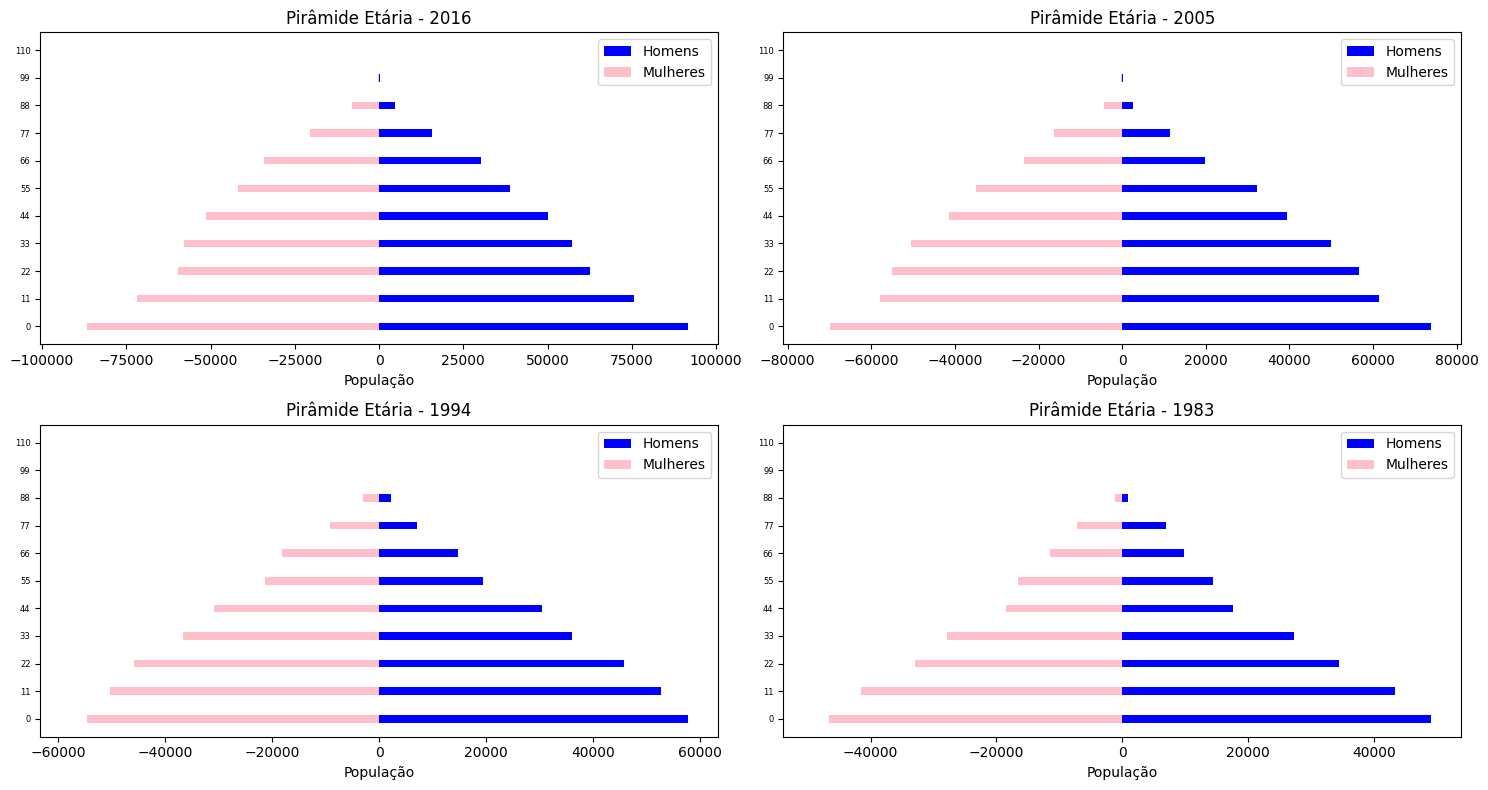

In [20]:
plot_piramide_etaria(34, 11)